In [ ]:
pip install --upgrade tensorflow

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
import pathlib
data_dir = pathlib.Path('D:/Users/Yongyong/Documents/School/3rd Year 2nd Sem/Capstone/FINAL/EfficientNet/data/train')

In [3]:
print(data_dir)

D:\Users\Yongyong\Documents\School\3rd Year 2nd Sem\Capstone\FINAL\EfficientNet\data\train


In [4]:
img_height,img_width=300,300
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode="categorical",
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 2704 files belonging to 5 classes.
Using 2164 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode="categorical",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2704 files belonging to 5 classes.
Using 540 files for validation.


In [6]:
import tensorflow as tf

# Define the directory path for testing data
test_data_dir = 'D:/Users/Yongyong/Documents/School/3rd Year 2nd Sem/Capstone/FINAL/EfficientNet/data/test'

# Define image dimensions and batch size
img_height = 300
img_width = 300
batch_size = 32

# Create the testing dataset using image_dataset_from_directory
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Print class names and dataset information
class_names = test_ds.class_names
num_classes = len(class_names)
print("Class Names:", class_names)
print("Number of Classes:", num_classes)
print("Dataset Info:", test_ds)

Found 132 files belonging to 5 classes.
Class Names: ['healthy', 'mas', 'str', 'tvl', 'xnotvalx']
Number of Classes: 5
Dataset Info: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>


In [7]:
class_names = train_ds.class_names
print(class_names)

['healthy', 'mas', 'str', 'tvl', 'xnotvalx']


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

In [9]:
resnet_model = Sequential()

# Load the pretrained EfficientNetB6 model without the top layer
pretrained_model = tf.keras.applications.EfficientNetB6(include_top=False,
                   input_shape=(300, 300, 3),
                   pooling='avg',
                   weights='imagenet')

# Freeze the layers of the pretrained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Add the pretrained model to the sequential model
resnet_model.add(pretrained_model)

# Add a Flatten layer to flatten the output of the pretrained model
resnet_model.add(Flatten())

# Add additional Dense layers with BatchNormalization and Dropout for regularization
resnet_model.add(Dense(1024, activation='relu'))
resnet_model.add(BatchNormalization())
resnet_model.add(Dropout(0.5))

resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(BatchNormalization())
resnet_model.add(Dropout(0.5))

resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(BatchNormalization())
resnet_model.add(Dropout(0.5))

resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(BatchNormalization())
resnet_model.add(Dropout(0.5))

# Add the final Dense layer with the number of classes and softmax activation
resnet_model.add(Dense(5, activation='softmax'))  # Assuming there are 4 classes

In [10]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb6 (Functional  (None, 2304)              40960143  
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 1024)              2360320   
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               5

In [11]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
) 

Epoch 1/10


68/68 [==============================] - 460s 6s/step - loss: 1.1231 - accuracy: 0.6007 - val_loss: 0.7134 - val_accuracy: 0.7519
Epoch 2/10
68/68 [==============================] - 407s 6s/step - loss: 0.4722 - accuracy: 0.8341 - val_loss: 0.3040 - val_accuracy: 0.9074
Epoch 3/10
68/68 [==============================] - 402s 6s/step - loss: 0.3316 - accuracy: 0.8859 - val_loss: 0.1876 - val_accuracy: 0.9444
Epoch 4/10
68/68 [==============================] - 422s 6s/step - loss: 0.2882 - accuracy: 0.9025 - val_loss: 0.1450 - val_accuracy: 0.9519
Epoch 5/10
68/68 [==============================] - 427s 6s/step - loss: 0.2200 - accuracy: 0.9247 - val_loss: 0.1062 - val_accuracy: 0.9648
Epoch 6/10
68/68 [==============================] - 421s 6s/step - loss: 0.1837 - accuracy: 0.9432 - val_loss: 0.0762 - val_accuracy: 0.9722
Epoch 7/10
68/68 [==============================] - 415s 6s/step - loss: 0.1469 - accuracy: 0.9506 - val_loss: 0.0931 - val_accuracy: 0.9667
Epoch 8/10


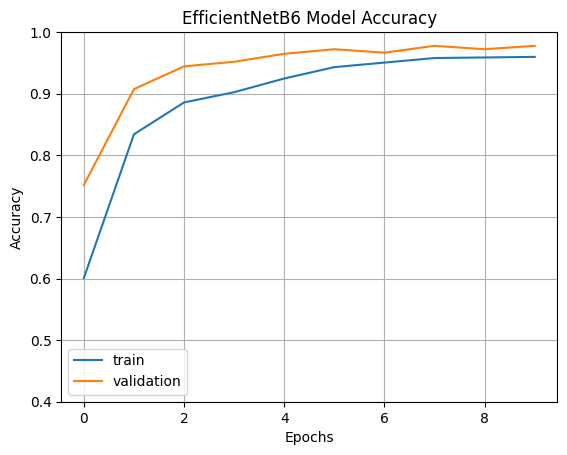

In [13]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('EfficientNetB6 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

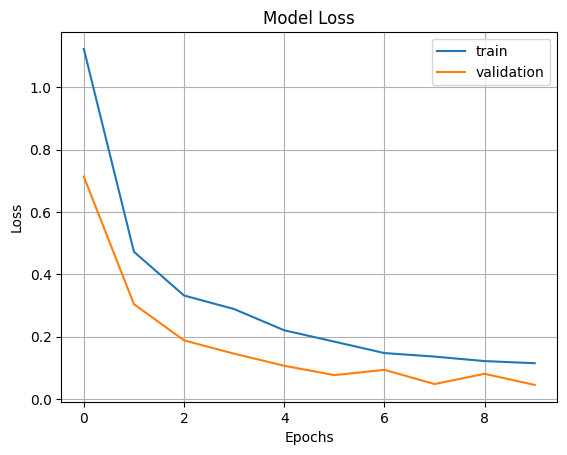

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

(1, 300, 300, 3)


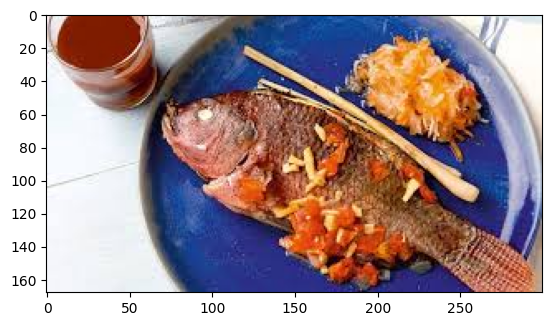

1/1 [==============================] - 5s 5s/step
[[3.9192269e-05 5.5744871e-04 9.8871133e-05 1.8929088e-04 9.9911517e-01]]
The predicted class is xnotvalx


In [15]:
import cv2
image=cv2.imread('D:/Users/Yongyong/Documents/School/3rd Year 2nd Sem/Capstone/data/images (1).jpg')
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)
img=cv2.imread('D:/Users/Yongyong/Documents/School/3rd Year 2nd Sem/Capstone/data/images (1).jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()
pred=resnet_model.predict(image)
print(pred)
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

1/1 [==============================] - 5s 5s/step


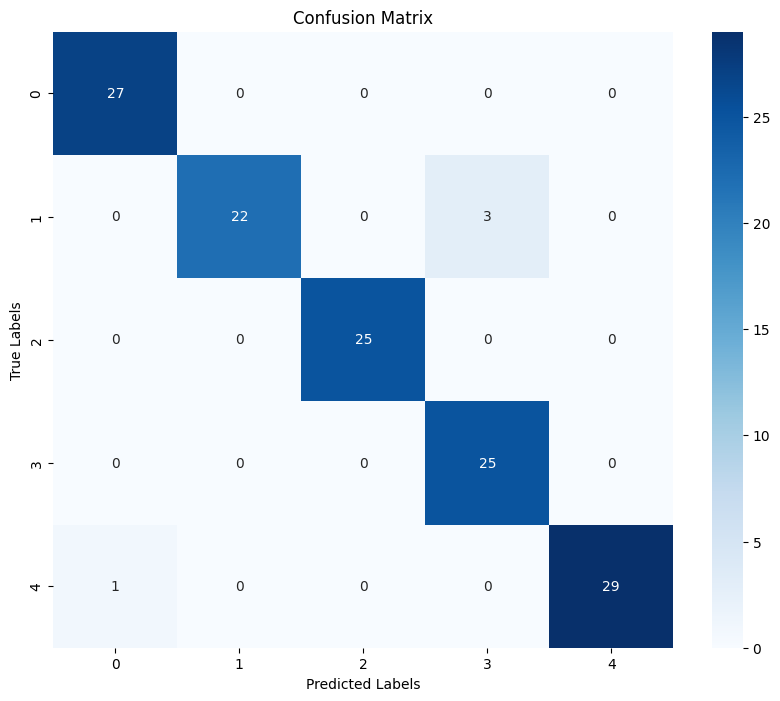

              precision    recall  f1-score   support

         col       0.96      1.00      0.98        27
     healthy       1.00      0.88      0.94        25
         mas       1.00      1.00      1.00        25
         str       0.89      1.00      0.94        25
      notval       1.00      0.97      0.98        30

    accuracy                           0.97       132
   macro avg       0.97      0.97      0.97       132
weighted avg       0.97      0.97      0.97       132



In [16]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get the true labels and predictions for the validation dataset
val_labels = []
val_predictions = []

for images, labels in test_ds:
    predictions = resnet_model.predict(images)
    val_labels.extend(np.argmax(labels.numpy(), axis=1))
    val_predictions.extend(np.argmax(predictions, axis=1))

val_labels = np.array(val_labels)
val_predictions = np.array(val_predictions)

# Compute the confusion matrix
conf_matrix = confusion_matrix(val_labels, val_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
class_names = val_ds.class_names
print(classification_report(val_labels, val_predictions, target_names=['col', 'healthy', 'mas', 'str', 'notval']))


In [17]:
from pathlib import Path
resnet_model.model_dir = "D:/Users/Yongyong/Documents/School/3rd Year 2nd Sem/Capstone/FINAL/EfficientNet"
resnet_model.save('my_model.h5')

d:\miniconda3\envs\my_env\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
import tensorflow as tf

# Load your trained EfficientNet model
model = tf.keras.models.load_model('D:/Users/Yongyong/Documents/School/3rd Year 2nd Sem/Capstone/FINAL/EfficientNet/my_model.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Optionally, optimize the model (e.g., apply quantization)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('my_model.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\Yongyong\AppData\Local\Temp\tmpyjag74cq\assets


INFO:tensorflow:Assets written to: C:\Users\Yongyong\AppData\Local\Temp\tmpyjag74cq\assets
